 #  A Whale off the Port(folio)

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Set images output path
output_path = 'Images/'

# Data Cleaning

## Whale Returns

In [3]:
# Reading whale returns

# Set the path to the CSV
whale_path = Path('Resources/whale_returns.csv')

# Read whale_returns.csv into a dataframe and display a few rows
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the `Date` as a datetime index
whale_df.sort_index(ascending=True, inplace=True) #sort the index
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum() #check that there are no more null values

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

In [6]:
# Reading algorithmic returns

# Set the path to the CSV
algo_path = Path('Resources/algo_returns.csv')

# Read algo_returns.csv into a dataframe and read a few rows
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True, inplace=True) #sort the index
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum() #check that there are no more null values

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

In [9]:
# Reading S&P 500 Closing Prices

# Set the path to the CSV
sp500_path = Path('Resources/sp500_history.csv')

# Read sp500_history.csv into a dataframe and read a few rows
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True, inplace=True) #sort the index
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

# Eliminate $ sign from data
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")

# Change datatype from object to float
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes #check that datatype changes were made

C:\Users\Grep\AppData\Local\Temp/ipykernel_41560/1656107845.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_df["Returns"] = sp500_df["Close"].pct_change() #create new column in dataframe with daily returns
sp500_df.drop(columns=['Close'], inplace=True)
sp500_df.head()


,Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_df = sp500_df.dropna()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={"Returns" : "S&P 500"}, inplace=True) #renamed `Returns` column because the `Close` column was eliminated (not needed)
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Quantitative Analysis

## Performance Analysis

#### Calculate and Plot the daily returns

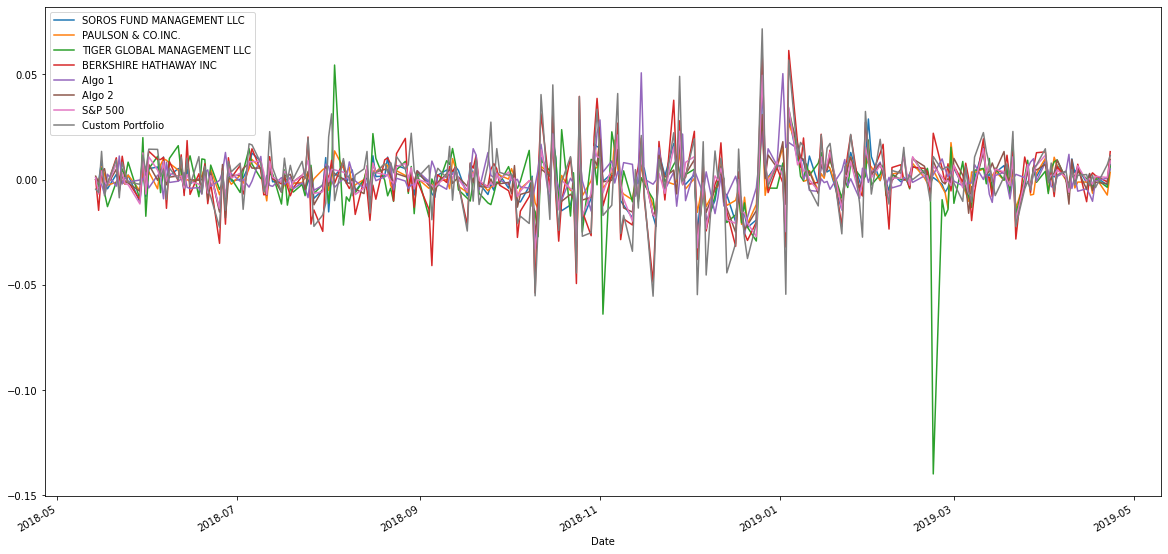

In [53]:
# Plot daily returns of all portfolios
returns_plot = combined_df.plot(figsize=(20,10))

fig = returns_plot.get_figure()
fig.savefig(output_path + 'returns_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

#### Calculate and Plot cumulative returns

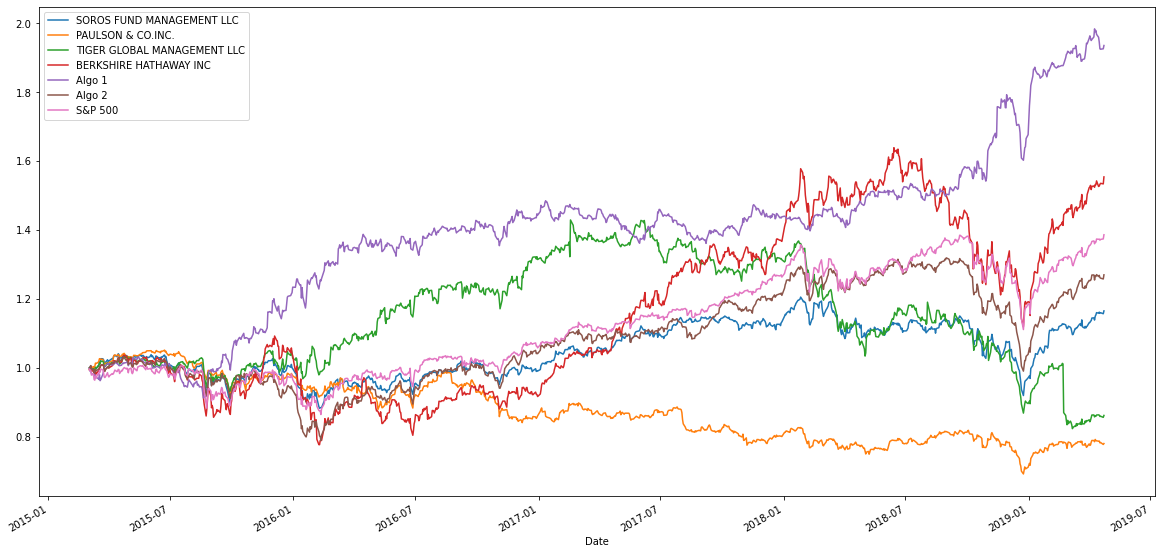

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_df).cumprod()

# Plot cumulative returns
cumulative_returns_plot = cumulative_returns.plot(figsize=(20,10))

fig = cumulative_returns_plot.get_figure()
fig.savefig(output_path + 'cumulative_returns_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

In [18]:
# QUESTION: Does any portfolio outperform the S&P 500?
# ANSWER:

# Sort the values for cumulative returns on last day of dataset in order of descending performance
last_cumulative_returns = cumulative_returns.iloc[-1].sort_values(ascending=False)

print(f"Here's the list of portfolios in order of descending performance:")
print("")
print(last_cumulative_returns)
print("")
print(f"The S&P 500 is outperformed by Algo 1 and Berkshire Hathaway INC")

Here's the list of portfolios in order of descending performance:

Algo 1                         1.934691
BERKSHIRE HATHAWAY INC         1.553401
S&P 500                        1.385517
Algo 2                         1.269247
SOROS FUND MANAGEMENT LLC      1.164568
TIGER GLOBAL MANAGEMENT LLC    0.861189
PAULSON & CO.INC.              0.779646
Name: 2019-04-23 00:00:00, dtype: float64

The S&P 500 is outperformed by Algo 1 and Berkshire Hathaway INC


---

## Risk Analysis

### Create a box plot for each portfolio


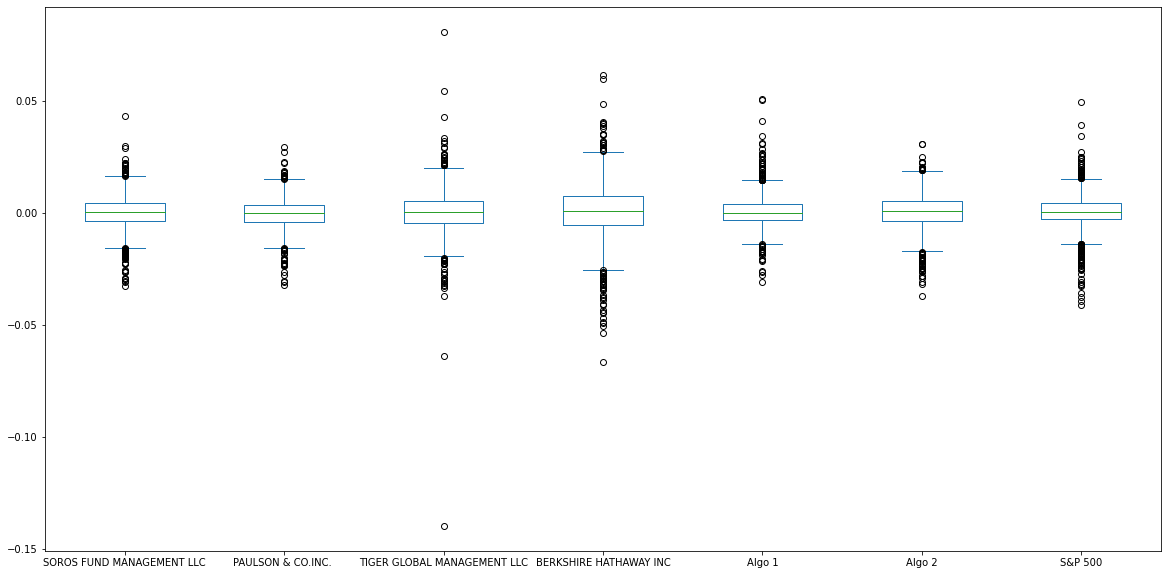

In [19]:
# Box plot to visually show risk
box_plot = combined_df.plot.box(figsize=(20,10))
fig = box_plot.get_figure()
fig.savefig(output_path + 'box_plot' + '.jpeg',bbox_inches='tight', pad_inches=0.2)

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_stdv = combined_df.std()
daily_stdv.sort_values(ascending=False)


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_stdv = daily_stdv["S&P 500"]

# Determine which portfolios are riskier than the S&P 500

for portfolio in range(len(daily_stdv)):  # The for loop compares the stdev of each portfolio with respect to the stdev of the S&P 500
    if daily_stdv[portfolio] > sp500_stdv:
        print(f"{daily_stdv.index[portfolio]} is riskier than the S&P 500") #by using index, I return the name of the portfolio not its value
    elif daily_stdv[portfolio] == sp500_stdv:
        pass
    else:
        print(f"{daily_stdv.index[portfolio]} is less risky than the S&P 500")

SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500
Algo 1 is less risky than the S&P 500
Algo 2 is less risky than the S&P 500


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stdv = daily_stdv * np.sqrt(252)
annualized_stdv

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

### Calculate and plot rolling `std` for all portfolios with 21-day window

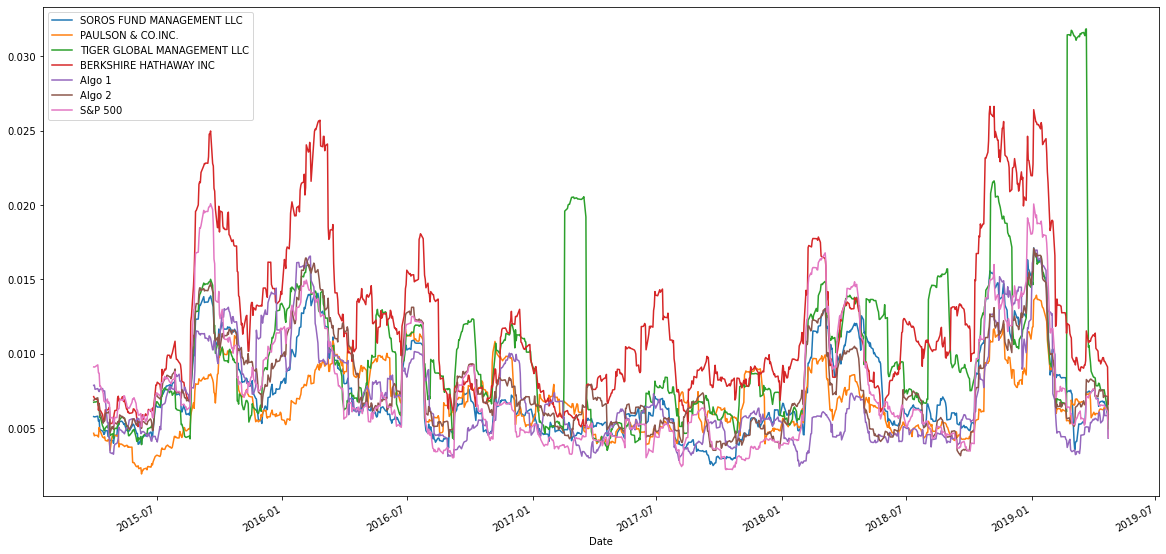

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portolio_rstdv = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rstdv_plot = combined_portolio_rstdv.plot(figsize = (20,10))
fig = rstdv_plot.get_figure()
fig.savefig(output_path + 'rstdv_plot' + '.jpeg',bbox_inches='tight', pad_inches=0.2)

### Calculate and plot the correlation

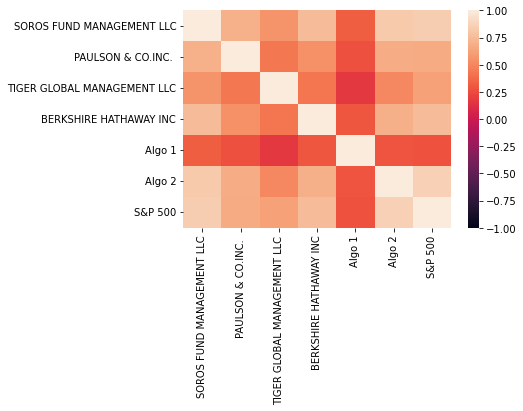

In [24]:
# Calculate the correlation
portfolios_correlation = combined_df.corr()

# Display de correlation matrix
heatmap = sns.heatmap(portfolios_correlation, vmin=-1, vmax=1)
fig = heatmap.get_figure()
fig.savefig(output_path + 'heatmap' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

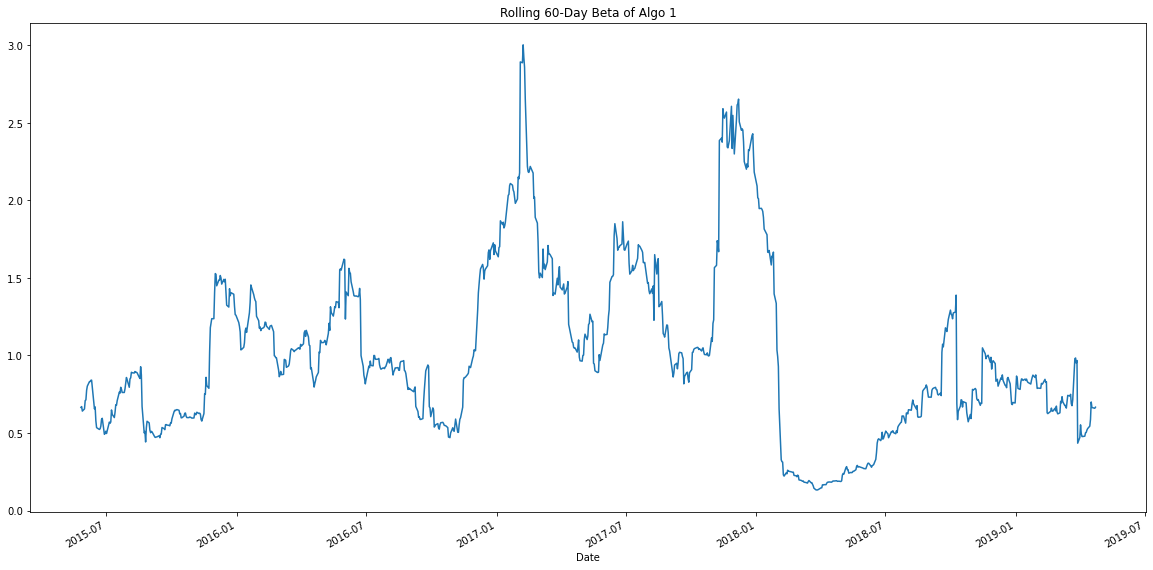

In [25]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].cov(combined_df["S&P 500"])

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()

# Computing beta
algo1_beta = covariance / variance

# Plot beta trend 
# Calculate and plot the 60-day rolling beta between chosen portfolio and the S&P 500
rolling_covariance = combined_df['Algo 1'].rolling(window=60).var()
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta_plot = rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

fig = rolling_beta_plot.get_figure()
fig.savefig(output_path + 'rolling_beta_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

### Rolling Window Through Exponentially Weighted Average 

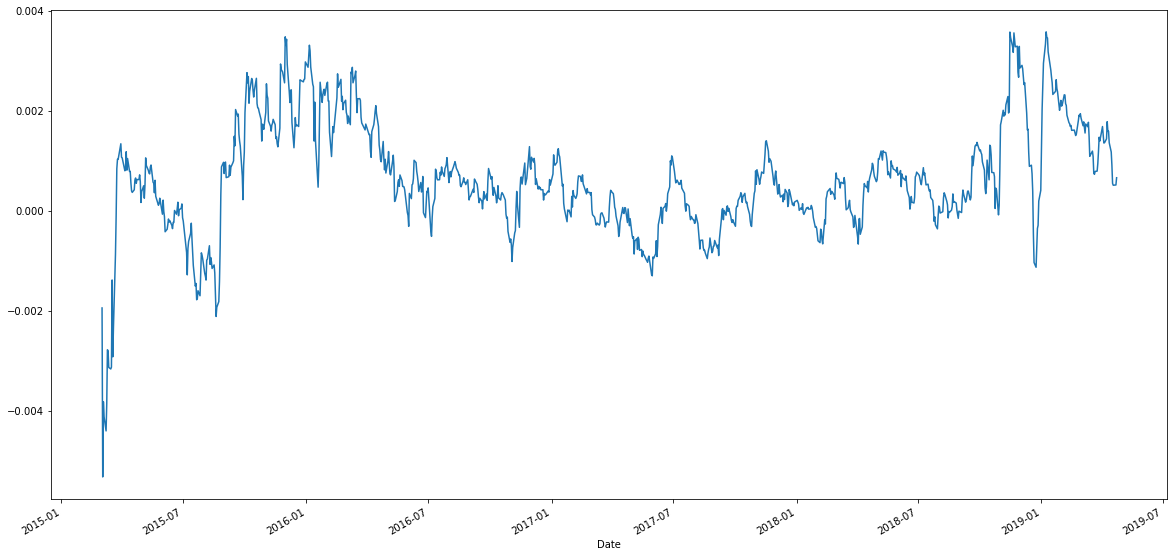

In [26]:
# Use `ewm` to calculate the rolling window for a chosen portfolio
ewm21 = combined_df['Algo 1'].ewm(halflife=21).mean()
ewm_plot = ewm21.plot(figsize=(20, 10))

fig = ewm_plot.get_figure()
fig.savefig(output_path + 'ewm_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

---

# Sharpe Ratios

### Calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios

# Will calculate the Sharpe Ratios by computing the quotient of `annualized average return` and `annualized standard deviation` 
# This is because I have no data for the risk-free rate of return on the portfolio

sharpe_ratios = (combined_df.mean() * 252) / (annualized_stdv)
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

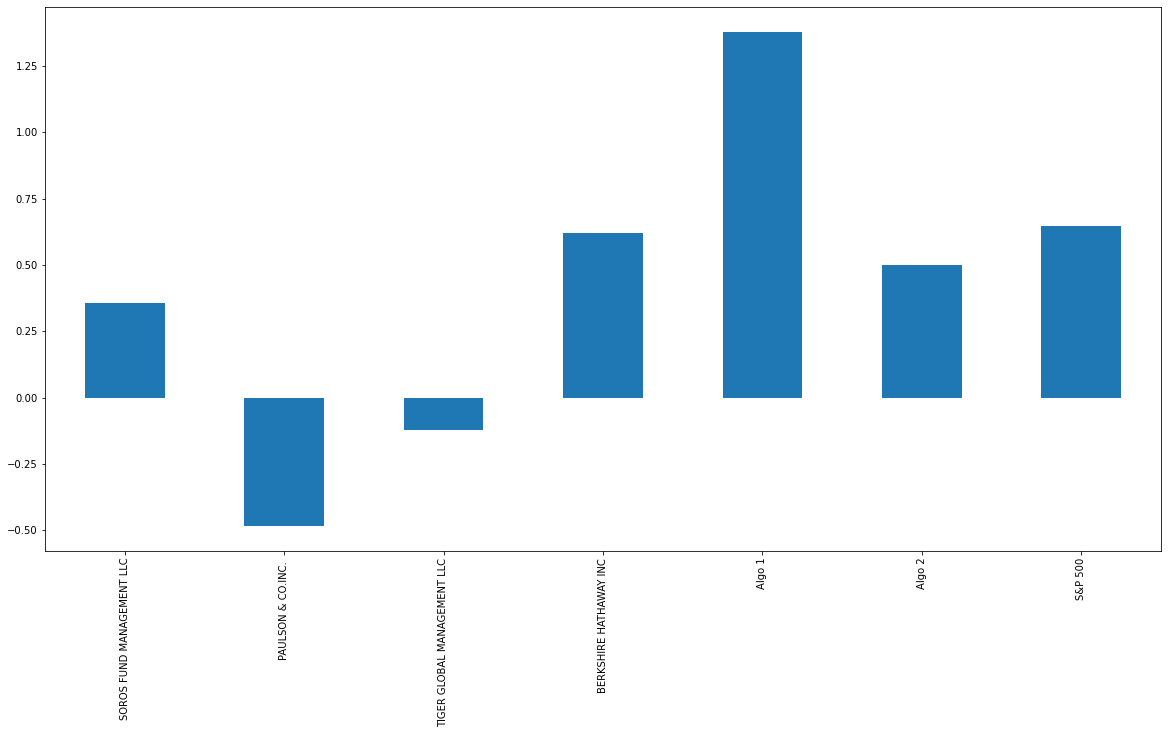

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_plot = sharpe_ratios.plot(kind='bar', figsize=(20,10))
fig = sharpe_ratios_plot.get_figure()
fig.savefig(output_path + 'sharpe_ratios_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

# Conclusions

Based on risk to reward,
- Algo 1 outperforms the S&P 500 and the whales portfolios.
- Algo 2 outperforms most whales portfolios, except for the Berkshire Hathaway INC and the S&P500.

---

# Create Custom Portfolio

Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

The following 5 companies listed in the S&P 500 index will be used for this example:

* `GOOG` - [Google, LLC](https://finance.yahoo.com/quote/GOOG?p=GOOG)

* `AAPL` - [Apple Inc.](https://finance.yahoo.com/quote/AAPL?p=AAPL)

* `COST` - [Costco Wholesale Corporation](https://finance.yahoo.com/quote/COST?p=COST)

* `ADBE` - [Adobe](https://finance.yahoo.com/quote/ADBE?p=ADBE)

* `SQ` - [Square](https://finance.yahoo.com/quote/SQ?p=SQ)

## Read Portfolio Datasets

In [29]:
# Reading data from 1st stock

# Set the path to the CSV
aapl_path = Path('Resources/aapl_historical.csv')

# Read csv into a dataframe and display a few rows
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
aapl_df.sort_index(ascending=True,inplace=True) #sort the index
aapl_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
aapl_df.columns = ['AAPL'] # rename column
aapl_df.head()


,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [30]:
# Reading data from 2nd stock

# Set the path to the CSV
goog_path = Path('Resources/goog_historical.csv')

# Read csv into a dataframe and display a few rows
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
goog_df.sort_index(ascending=True,inplace=True) #sort the index
goog_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
goog_df.columns = ['GOOG'] # rename column
goog_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [31]:
# Reading data from 3rd stock

# Set the path to the CSV
cost_path = Path('Resources/cost_historical.csv')

# Read csv into a dataframe and display a few rows
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
cost_df.sort_index(ascending=True,inplace=True) #sort the index
cost_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
cost_df.columns = ['COST'] # rename column
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [32]:
# Reading data from 4th stock
# Used Google Finance function to obtain data from ADOBE

# Set the path to the CSV
adbe_path = Path('Resources/adbe_historical.csv')

# Read csv into a dataframe and display a few rows
adbe_df = pd.read_csv(adbe_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
adbe_df.sort_index(ascending=True,inplace=True) #sort the index
adbe_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
adbe_df.columns = ['ADBE'] # rename column
adbe_df.head()

,ADBE
Date,
2018-05-11,241.88
2018-05-14,238.37
2018-05-15,236.60
2018-05-16,237.39
2018-05-17,236.85


In [33]:
# Reading data from 5th stock
# Used Google Finance function to obtain data from Square

# Set the path to the CSV
sq_path = Path('Resources/sq_historical.csv')

# Read csv into a dataframe and display a few rows
sq_df = pd.read_csv(sq_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
sq_df.sort_index(ascending=True,inplace=True) #sort the index
sq_df.columns = ['SQ'] # rename column
sq_df.head()

,SQ
Date,
2018-05-11,54.73
2018-05-14,54.28
2018-05-15,54.65
2018-05-16,56.59
2018-05-17,54.82


In [34]:
# Combine all stocks in a single DataFrame

custom_df = pd.concat([aapl_df, goog_df, cost_df, adbe_df, sq_df], axis='columns', join='inner')
custom_df.index.rename('Date', inplace=True)
custom_df.head()


,AAPL,GOOG,COST,ADBE,SQ
Date,,,,,
2018-05-11,188.59,1098.26,195.76,241.88,54.73
2018-05-14,188.15,1100.20,195.88,238.37,54.28
2018-05-15,186.44,1079.23,195.48,236.60,54.65
2018-05-16,188.18,1081.77,198.71,237.39,56.59
2018-05-17,186.99,1078.59,199.60,236.85,54.82


In [35]:
# Calculate daily returns
daily_returns = custom_df.pct_change() 

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,AAPL,GOOG,COST,ADBE,SQ
Date,,,,,
2018-05-14,-0.002333,0.001766,0.000613,-0.014511,-0.008222
2018-05-15,-0.009088,-0.019060,-0.002042,-0.007425,0.006817
2018-05-16,0.009333,0.002354,0.016523,0.003339,0.035499
2018-05-17,-0.006324,-0.002940,0.004479,-0.002275,-0.031278
2018-05-18,-0.003637,-0.011339,-0.003206,0.005235,0.004013


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
custom_returns = daily_returns.dot(weights)

# Display sample data
custom_returns.sample(5)

Date
2019-04-24   -0.003175
2018-07-25    0.019881
2018-09-04    0.006787
2018-11-21    0.009687
2019-04-26   -0.000953
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["Custom Portfolio"]= custom_returns
combined_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
Date,,,,,,,,
2017-05-15,0.004935,-0.000182,0.005329,0.002375,-0.000293,0.006161,0.004776,NaN
2018-10-18,-0.010673,-0.005336,-0.013776,-0.029240,-0.003966,-0.011887,-0.014392,-0.024095
2015-08-20,-0.019236,-0.014526,-0.019340,-0.047108,-0.014021,-0.018880,-0.021100,NaN
2019-03-08,0.000350,0.003437,0.004437,-0.005996,0.007106,-0.002993,-0.002132,0.010699
2017-03-31,-0.000222,-0.004279,-0.002949,-0.001615,-0.000261,0.003036,-0.002255,NaN


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.004537
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.006160
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.013409
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.007667
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.001787


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
annualized_stdv2 = combined_df.std()*np.sqrt(252)
annualized_stdv2.sort_values(ascending=False, inplace=True)
annualized_stdv2

Custom Portfolio               0.276035
BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
S&P 500                        0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

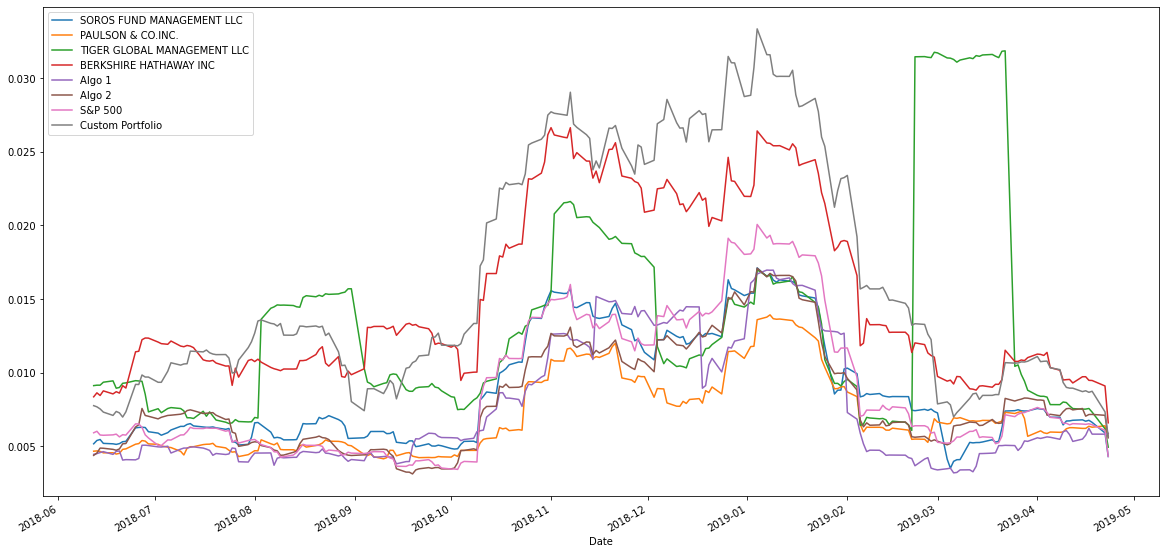

In [44]:
# Calculate rolling standard deviation
combined_portolio_rstdv = combined_df.rolling(window=21).std()

# Plot rolling standard deviation
combined_portolio_rstdv_plot = combined_portolio_rstdv.plot(figsize = (20,10))
fig = combined_portolio_rstdv_plot.get_figure()
fig.savefig(output_path + 'combined_portolio_rstdv_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)


### Calculate and plot the correlation

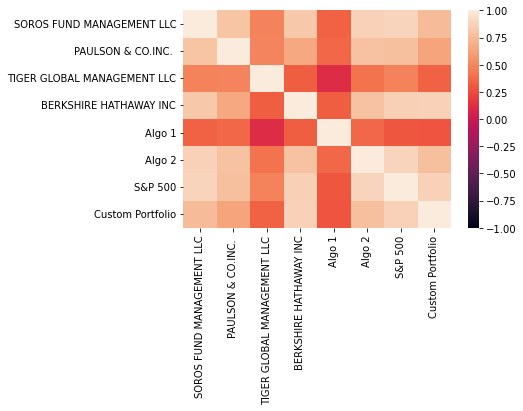

In [45]:
# Calculate and plot the correlation
portfolios_correlation2 = combined_df.corr()

# Display de correlation matrix
heatmap_custom = sns.heatmap(portfolios_correlation2, vmin=-1, vmax=1)

fig = heatmap_custom.get_figure()
fig.savefig(output_path + 'heatmap_custom' + '.jpeg', bbox_inches='tight', pad_inches=0.2)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

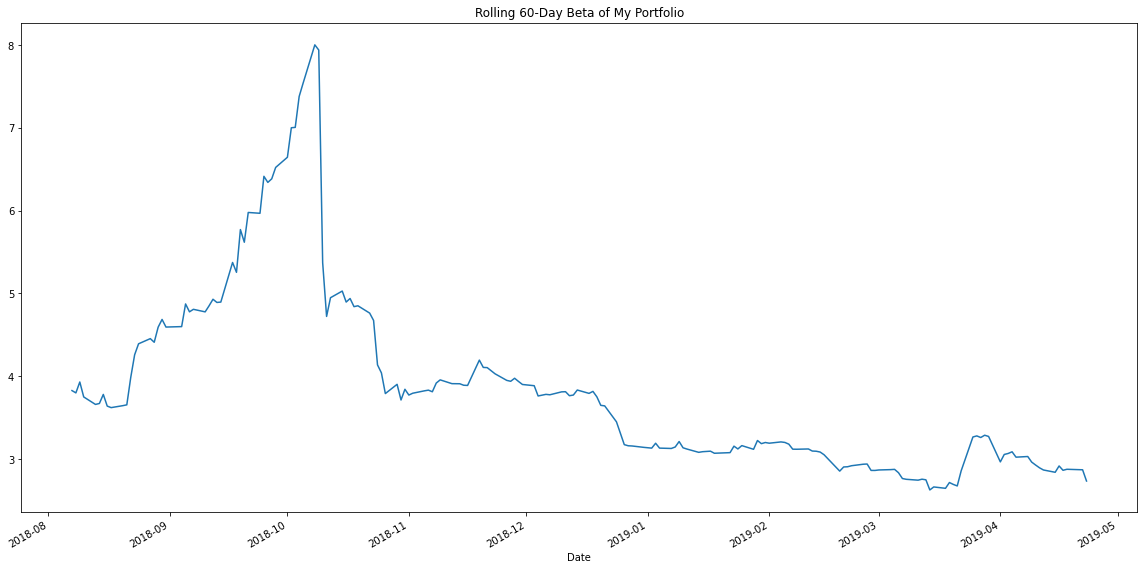

In [49]:
# Calculate and plot Beta
covariance = combined_df["Custom Portfolio"].cov(combined_df["S&P 500"])

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()

# Computing beta
my_portfolio_beta = covariance / variance

# Plot beta trend 
# Calculate and plot the 60-day rolling beta between chosen portfolio and the S&P 500
rolling_covariance = combined_df['Custom Portfolio'].rolling(window=60).var()
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
my_rolling_beta = rolling_covariance / rolling_variance
rolling_beta_custom = my_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

fig = rolling_beta_custom.get_figure()
fig.savefig(output_path + 'rolling_beta_custom' + '.jpeg', bbox_inches='tight', pad_inches=0.2)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios

# Will calculate the Sharpe Ratios by computing the quotient of `annualized average return` and `annualized standard deviation` 
# This is because I have no data for the risk-free rate of return on the portfolio

sharpe_ratios = (combined_df.mean() * 252) / (annualized_stdv2)
sharpe_ratios

Algo 1                         2.035665
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
Custom Portfolio               0.911279
PAULSON & CO.INC.              0.258738
S&P 500                        0.584820
SOROS FUND MANAGEMENT LLC      0.430713
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

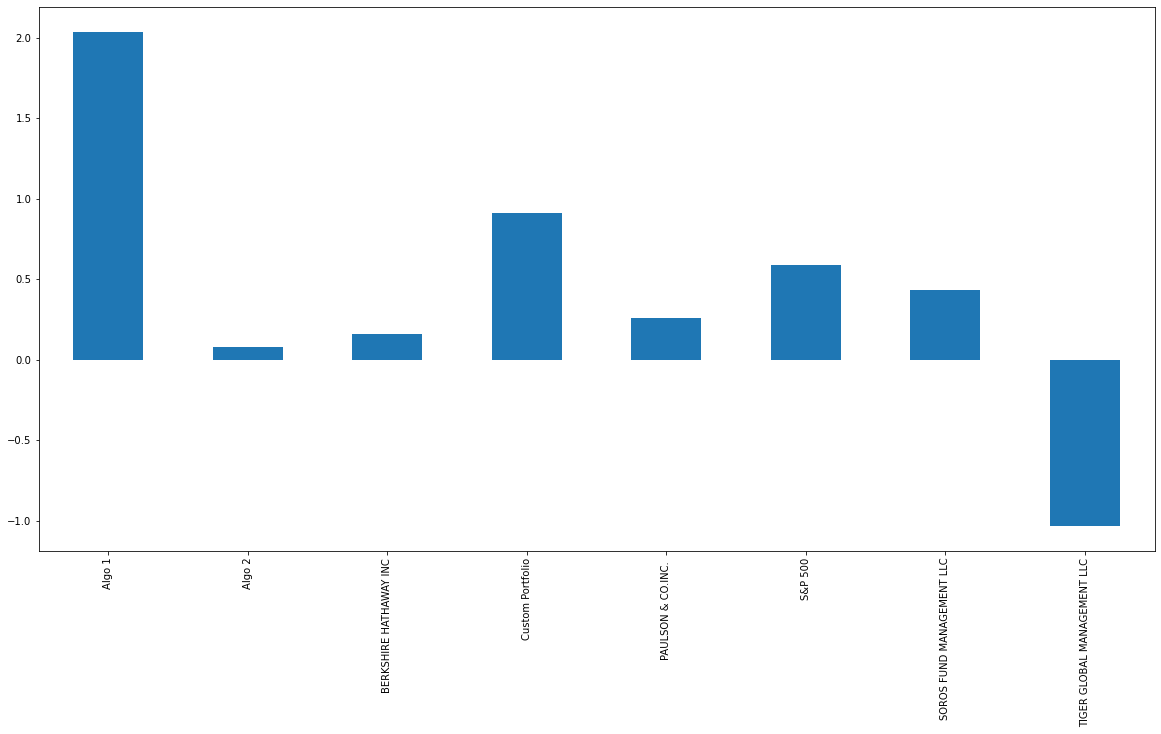

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10))
fig = sharpe_ratios_plot.get_figure()
fig.savefig(output_path + 'sharpe_ratios_plot' + '.jpeg', bbox_inches='tight', pad_inches=0.2)

### How does your portfolio do?

Custom Porfolio is the second best performer. It's only surpassed by Algo 1.